In [1]:
from IPython.display import Latex

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

In [2]:
def chi_square(x, y, func, p, delta_y=1):
    return sum((func(x, *p) - y)**2 / delta_y**2) / len(x)

In [3]:
t = 8.135e-2
delta_t = 0.001e-2
delta_x = 1e-3 / np.sqrt(5)

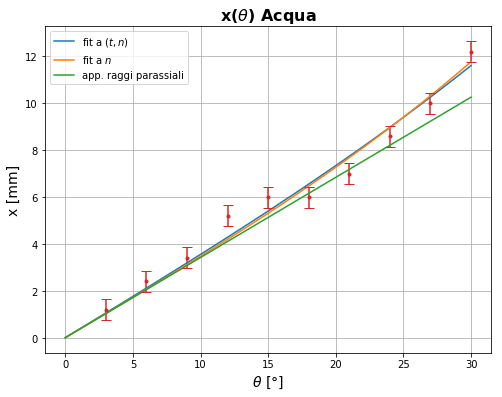

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
plt.rcParams['figure.figsize'] = (8, 6)
water = pd.read_csv('data/acqua.csv')
x_ = np.linspace(0, np.pi/6)

# fit water set two parameters
f = lambda x, p0, p1: p0*np.sin(x)* (1 - np.sqrt((1-np.sin(x)**2) / (p1**2-np.sin(x)**2)))
popt, pcov = optimize.curve_fit(f, water.theta/180*np.pi, water.x, p0=(80,1.3))
perr = np.sqrt(np.diag(pcov))
plt.plot(x_*180/np.pi, f(x_, *popt), label='fit a $(t, n)$')

# fit water set one parameter
f_n = lambda x, p0: 1e3*t*np.sin(x)* (1 - np.sqrt((1-np.sin(x)**2) / (p0**2-np.sin(x)**2)))
popt_n, pcov_n = optimize.curve_fit(f_n, water.theta/180*np.pi, water.x, p0=(1.3))
perr_n = np.sqrt(np.diag(pcov_n))
plt.plot(x_*180/np.pi, f_n(x_, *popt_n), label='fit a $n$')

# paraxial rays approximation
f_p = lambda x, p0: 1e3*t*x/p0 * (p0-1)
plt.plot(x_*180/np.pi, f_p(x_, *popt_n), label='app. raggi parassiali')

plt.errorbar(water.theta, water.x, yerr=np.ones(10)*delta_x*1e3, fmt='.', capsize=5, label=None)
plt.xlabel('$\\theta$ [°]', fontsize=14)
plt.ylabel('x [mm]', fontsize=14)
plt.title('x($\\theta$) Acqua', fontsize=16, weight='bold')
plt.legend()
plt.grid()
pp.savefig()
plt.show()

display(Latex(f't = $({popt[0]:.2f} \pm {perr[0]:.2f})$ mm; n = $({popt[1]:.1f} \pm {perr[1]:.1f})$'))
display(Latex(f'n = $({popt_n[0]:.2f} \pm {perr_n[0]:.2f})$'))
perc_err = (f_n(20/180*np.pi, *popt_n) - f_p(20/180*np.pi, *popt_n)) / f_p(20/180*np.pi, *popt_n) * 100
display(Latex(f'$\%_{{err}} = {perc_err:.2f} \%$'))

In [5]:
chi_water = chi_square(water.theta/180*np.pi, water.x, f, popt, delta_y=delta_x*1e3)
chi_water_n = chi_square(water.theta/180*np.pi, water.x, f_n, popt_n, delta_y=delta_x*1e3)
print(f'{chi_water:.2f} {chi_water_n:.2f}')

1.38 1.41


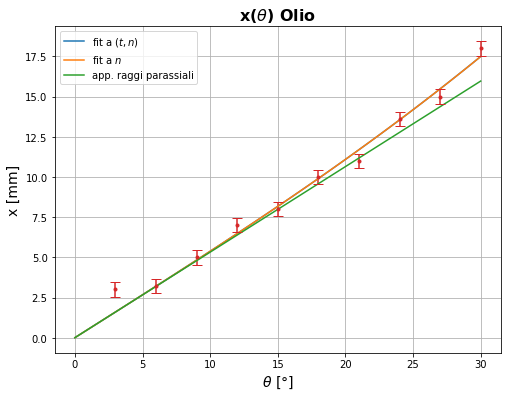

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
oil = pd.read_csv('data/olio.csv')
x_ = np.linspace(0, np.pi/6)

# fit oil set two parameters
f = lambda x, p0, p1: p0*np.sin(x)* (1 - np.sqrt((1-np.sin(x)**2) / (p1**2-np.sin(x)**2)))
popt, pcov = optimize.curve_fit(f, oil.theta/180*np.pi, oil.x, p0=(80,1.3))
perr = np.sqrt(np.diag(pcov))
plt.plot(x_*180/np.pi, f(x_, *popt), label='fit a $(t, n)$')

# fit oil set one parameter
f_n = lambda x, p0: 1e3*t*np.sin(x)* (1 - np.sqrt((1-np.sin(x)**2) / (p0**2-np.sin(x)**2)))
popt_n, pcov_n = optimize.curve_fit(f_n, oil.theta/180*np.pi, oil.x, p0=(1.3))
perr_n = np.sqrt(np.diag(pcov_n))
plt.plot(x_*180/np.pi, f_n(x_, *popt_n), label='fit a $n$')x

# paraxial rays approximation
f_p = lambda x, p0: 1e3*t*x/p0 * (p0-1)
plt.plot(x_*180/np.pi, f_p(x_, *popt_n), label='app. raggi parassiali')

plt.errorbar(oil.theta, oil.x, yerr=np.ones(10)*delta_x*1e3, fmt='.', capsize=5, label=None)
plt.xlabel('$\\theta$ [°]', fontsize=14)
plt.ylabel('x [mm]', fontsize=14)
plt.title('x($\\theta$) Olio', fontsize=16, weight='bold')
plt.legend()
plt.grid()
pp.savefig()
plt.show()

display(Latex(f't = $({popt[0]:.2f} \pm {perr[0]:.2f})$ mm; n = $({popt[1]:.1f} \pm {perr[1]:.1f})$'))
display(Latex(f'n = $({popt_n[0]:.2f} \pm {perr_n[0]:.2f})$'))
perc_err = (f_n(20/180*np.pi, *popt_n) - f_p(20/180*np.pi, *popt_n)) / f_p(20/180*np.pi, *popt_n) * 100
display(Latex(f'$\%_{{err}} = {perc_err:.2f} \%$'))

In [7]:
chi_oil = chi_square(oil.theta/180*np.pi, oil.x, f, popt, delta_y=delta_x*1e3)
chi_oil_n = chi_square(oil.theta/180*np.pi, oil.x, f_n, popt_n, delta_y=delta_x*1e3)
print(f'{chi_oil:.2f} {chi_oil_n:.2f}')
pp.close()

1.64 1.64
